# Пример создателей roc_utils
Запускаем пример создателей roc_utils, проверяем, что значения и картинка не изменились после изменений в библиотеке

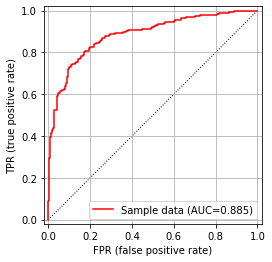

show_ti = True
show_ci = True
show_all = False


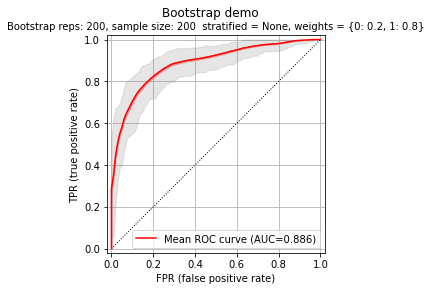

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import roc_utils as ru
from sklearn.utils import resample

# Construct a binary classification problem
x, y = ru.demo_sample_data(n1=300, mu1=0.0, std1=0.5,
                           n2=300, mu2=1.0, std2=0.7)

# Compute the ROC curve...
pos_label = 1
y = y.astype(int)

roc = ru.compute_roc(X=x, y=y, pos_label=pos_label)

# ...and visualize it
ru.plot_roc(roc, label="Sample data", color="red")
plt.show()

# To perform a ROC analysis using bootstrapping
n_bootstrap = 200
n_samples = 200
weights = { 0: 0.2, 1 : 0.8}
ru.plot_roc_bootstrap(X=x, y=y, pos_label=pos_label,
                      n_bootstrap=n_bootstrap,
                      n_samples = n_samples,
                      weights = weights,
                      stratified = None,
                      title="Bootstrap demo");
plt.show()


# pos_label = True
# roc = compute_roc(X=x, y=y, pos_label=pos_label)

# # ...and visualize it
# plot_roc(roc, label="Sample data", color="red")
# plt.show()

# # To perform a ROC analysis using bootstrapping
# n_samples = 20
# plot_roc_bootstrap(X=x, y=y, pos_label=pos_label,
#                       n_bootstrap=n_samples,
#                       title="Bootstrap demo");
# plt.show()

# y_0 = 10 - y
# y_new = np.hstack((y_0, y))

Генерим те же графики для 2 классов, только используем новую функцию для мультикласса (с количеством классов 2)

In [45]:
x_0 = 10 - x
x_new = np.hstack((x_0.reshape(-1, 1), x.reshape(-1, 1)))
y = y.astype(int)

show_ti = True
show_ci = True
show_all = False


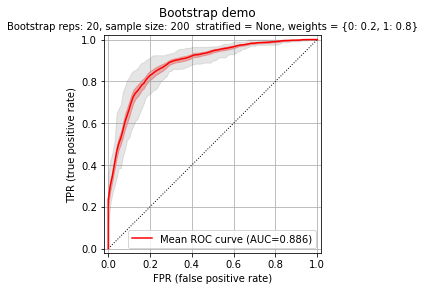

In [46]:
# To perform a ROC analysis using bootstrapping
n_bootstrap = 20
rets = ru.plot_roc_bootstrap(x_new, y, 
                      n_bootstrap=n_bootstrap,
                      n_samples = n_samples,
                      weights = weights,
                      stratified = None,
                      title="Bootstrap demo",
                      multi = "Classes",
                      num_classes_or_labels = 2)
plt.show()



In [47]:
print(f"mean = {rets['auc_mean']}")
print(f"std = {rets['auc_std']}")
print(f"CI = {rets['auc95_ci']}")
print(f"TI = {rets['auc95_ti']}")

mean = 0.8857616241419619
std = 0.020698134843635023
CI = [[0.87582295 0.8957003 ]]
TI = [[0.8413145  0.93020874]]


# Пример для датасета с 5 классами (мультикласс), метод Macro Average

Создаем датасет с 10 фичами, 5 классами, применяем к нему классификатор и строим ROC для мультикласса

In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

# from sklearn import svm, datasets
# iris = datasets.load_iris()
# X = iris.data
# y = y_true = iris.target

# data = pd.read_csv("seeds.csv", sep = ',')
# X = data[data.columns[:-1]]
# y = data['Type'] - 1
# X_train, X_test, y_train, y_true = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.datasets import make_multilabel_classification, make_classification

X, y = make_classification(n_samples=1200, n_features=10, n_informative = 5,  n_classes=5) 
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_true = train_test_split(X, y, test_size=0.5, random_state=42)

(1200, 10)
(1200,)


In [49]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier ()
model.fit(X_train,y_train)
y_score = model.predict_proba(X_test)
print(y_score.shape)

(600, 5)


In [50]:
from collections import Counter
classes = list(set(y_true))
print(Counter(y_true))

Counter({2: 131, 3: 122, 4: 121, 0: 118, 1: 108})


Строим одну усредненную рок кривую, без построения доверительных интервалов, без выборок методом бутстреп

In [51]:
num_classes = 5
roc = ru.compute_roc_multi(y_score, y_true, num_classes, multi = "Classes")

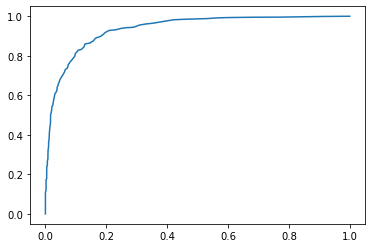

In [52]:
from matplotlib import pyplot as plot

plt.plot(roc.fpr, roc.tpr)

Строим усреденную рок кривую для выборок методом бутстреп. На вход функции массивы размерами (y_score -  (n_samples,n_classes), 
y_true (n_samples, ))

In [53]:
rets = ru.compute_roc_bootstrap(y_score, y_true, 
                            stratified = True, 
                            n_bootstrap=1000,
                            n_samples = None,
                            multi = "Classes",
                            num_classes_or_labels = 5)

In [54]:
print(f"mean = {rets['auc_mean']}")
print(f"std = {rets['auc_std']}")
print(f"CI = {rets['auc95_ci']}")
print(f"TI = {rets['auc95_ti']}")


mean = 0.9356887915662565
std = 0.00642367812994877
CI = [[0.93528997 0.93608761]]
TI = [[0.92307703 0.94830055]]


In [55]:
print(y_score.shape, y_true.shape)

(600, 5) (600,)


show_ti = True
show_ci = True
show_all = False


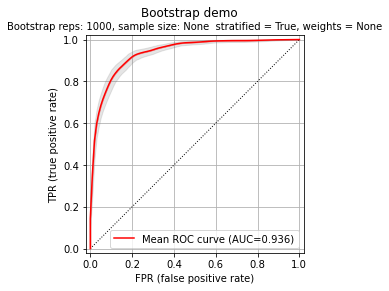

In [56]:
n_bootstrap = 1000
rets = ru.plot_roc_bootstrap(y_score, y_true, 
                      n_bootstrap=n_bootstrap,
                      n_samples = None,
                      stratified=True,
                      title="Bootstrap demo",
                      multi = "Classes",
                      num_classes_or_labels = 5)

In [57]:
print(f"mean = {rets['auc_mean']}")
print(f"std = {rets['auc_std']}")
print(f"CI = {rets['auc95_ci']}")
print(f"TI = {rets['auc95_ti']}")

mean = 0.9361029662919352
std = 0.0064552853765412425
CI = [[0.93570219 0.93650375]]
TI = [[0.92342915 0.94877678]]


Посчитаем метрики другим способом

In [58]:
mean, std = ru.calculate_bootstrap_auc_way2(y_score, y_true, n_bootstrap = 1000, multi = "Classes", num_classes_or_labels = 5)
print(mean)
print(std)

[0.014051028558600551, 0.01062730095419716, 0.0100124059902673, 0.012547482449964129, 0.012054164817981505] [0.9296189464672228, 0.9435589822124364, 0.9480789326833294, 0.9201910225371034, 0.9314902635175567]
0.9345876294835296
0.005341765281742917


# Пример для датасета с 2 лейблами (мультилейбел), метод Macro Average

In [59]:
from sklearn.datasets import make_multilabel_classification

X, y = make_multilabel_classification(n_samples=1200, n_features=3, n_classes=2, n_labels=2)

In [60]:
print(X.shape)
print(y.shape)

(1200, 3)
(1200, 2)


In [61]:
X_train, X_test, y_train, y_true = train_test_split(X, y, test_size=0.5, random_state=42)

from sklearn import tree
from sklearn.linear_model import LogisticRegression



In [62]:
model1 = LogisticRegression()
model1.fit(X_train,y_train[:, 0])
y_score1 = model1.predict_proba(X_test)
print(y_score1.shape)

(600, 2)


In [63]:
model2 = LogisticRegression()
model2.fit(X_train,y_train[:, 1])
y_score2 = model2.predict_proba(X_test)
print(y_score2.shape)

(600, 2)


In [64]:
y_pred = np.hstack((y_score1[:, 1].reshape(-1, 1), y_score2[:, 1].reshape(-1, 1)))

In [65]:
print(y_true.shape)
print(y_pred.shape)

(600, 2)
(600, 2)


На вход функции массивы размерами (y_pred -  (n_samples,n_classes), y_true (n_samples, n_classes))

show_ti = True
show_ci = True
show_all = False


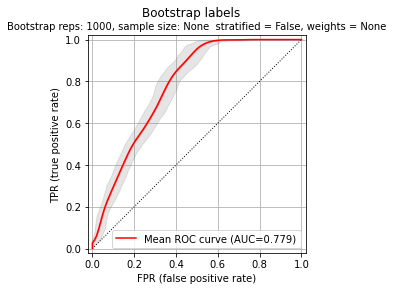

In [66]:
n_bootstrap = 1000
rets = ru.plot_roc_bootstrap(y_pred, y_true, 
                      n_bootstrap=n_bootstrap,
                      title="Bootstrap labels",
                      multi = "Labels",
                      num_classes_or_labels = 2)

In [67]:
print(f"mean = {rets['auc_mean']}")
print(f"std = {rets['auc_std']}")
print(f"CI = {rets['auc95_ci']}")
print(f"TI = {rets['auc95_ti']}")

mean = 0.779446592893251
std = 0.01529420823044897
CI = [[0.77849704 0.78039615]]
TI = [[0.74941912 0.80947407]]


In [68]:
mean, std = ru.calculate_bootstrap_auc_way2(y_pred, y_true, n_bootstrap = 1000, multi = "Labels", num_classes_or_labels = 2)
print(mean)
print(std)

[0.016188807530169512, 0.02418682970695939] [0.864605965775073, 0.6986396572962034]
0.7816228115356382
0.014552321296981509


# Пример построения macro average roc из sklearn
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
#y = label_binarize(y, classes=[0, 1, 2])
n_classes = 3#y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train_old, y_test_old = train_test_split(X, y, test_size=0.5, random_state=0)

y_train = label_binarize(y_train_old, classes=[0, 1, 2])
y_test = label_binarize(y_test_old, classes=[0, 1, 2])

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

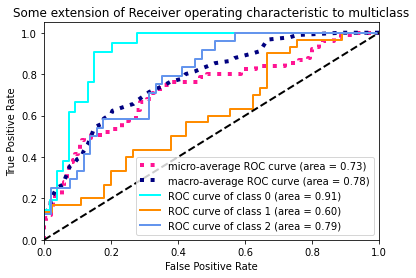

In [70]:
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [71]:
print(y_score.shape)
print(y_test_old.shape)

(75, 3)
(75,)


show_ti = True
show_ci = True
show_all = False


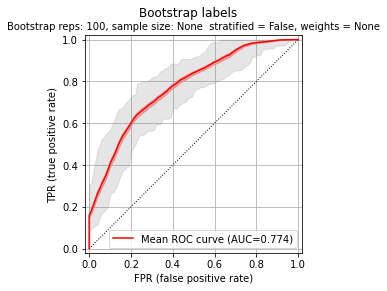

In [72]:
n_bootstrap = 100
rets = ru.plot_roc_bootstrap(y_score, y_test_old, 
                      n_bootstrap=n_bootstrap,
                      title="Bootstrap labels",
                      multi = "Classes",
                      num_classes_or_labels = 3)

In [73]:
print(f"mean = {rets['auc_mean']}")
print(f"std = {rets['auc_std']}")
print(f"CI = {rets['auc95_ci']}")
print(f"TI = {rets['auc95_ti']}")

mean = 0.7742145746222658
std = 0.033511542706720195
CI = [[0.76753166 0.78089749]]
TI = [[0.70738542 0.84104373]]


Сверка Таниных данных с моими

In [74]:
import pandas as pd
data = pd.read_excel("results_MMG_Celsus9_12_21full.xlsx")

In [75]:
y_score = data['result'].values/100
y_true = data['GT'].values

In [76]:
y_score_0 = 1 - y_score
y_score_all = np.hstack((y_score_0 .reshape(-1, 1), y_score.reshape(-1, 1)))

show_ti = True
show_ci = True
show_all = False


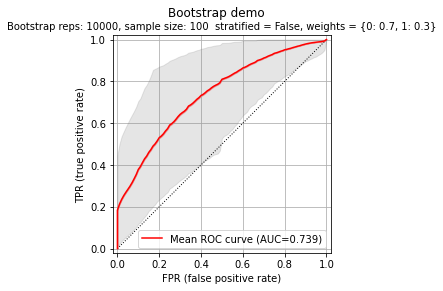

In [84]:
n_bootstrap = 10000
rets = ru.plot_roc_bootstrap(y_score_all, y_true, 
                      n_bootstrap=n_bootstrap,
                      n_samples = 100,
                      stratified = False,
                      weights = {0 : 0.7, 1 : 0.3},
                      title="Bootstrap demo",
                      multi = "Classes",
                      num_classes_or_labels = 2)
plt.show()

In [87]:
print(f"mean = {rets['auc_mean']}")
print(f"std = {rets['auc_std']}")
print(f"var = {rets['auc_std'] ** 2}")
print(f"CI = {rets['auc95_ci']}")
print(f"TI = {rets['auc95_ti']}")

mean = 0.7389411951562
std = 0.09207085880330405
var = 0.008477043040777952
CI = [[0.73713633 0.74074606]]
TI = [[0.55845476 0.91942763]]


show_ti = True
show_ci = True
show_all = False


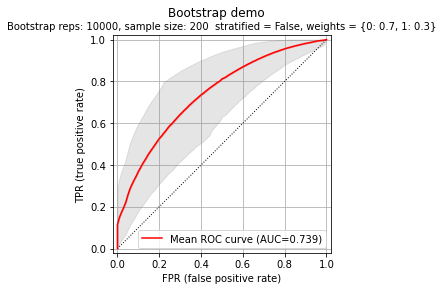

In [88]:
n_bootstrap = 10000
rets = ru.plot_roc_bootstrap(y_score_all, y_true, 
                      n_bootstrap=n_bootstrap,
                      n_samples = 200,
                      stratified = False,
                      weights = {0 : 0.7, 1 : 0.3},
                      title="Bootstrap demo",
                      multi = "Classes",
                      num_classes_or_labels = 2)
plt.show()

In [89]:
print(f"mean = {rets['auc_mean']}")
print(f"std = {rets['auc_std']}")
print(f"var = {rets['auc_std'] ** 2}")
print(f"CI = {rets['auc95_ci']}")
print(f"TI = {rets['auc95_ti']}")

mean = 0.7386546602078407
std = 0.06316644694310315
var = 0.003990000019415865
CI = [[0.73741641 0.73989291]]
TI = [[0.61482952 0.8624798 ]]


show_ti = True
show_ci = True
show_all = False


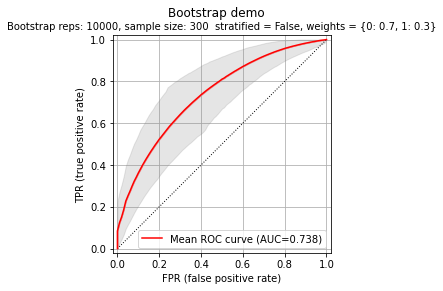

In [90]:
n_bootstrap = 10000
rets = ru.plot_roc_bootstrap(y_score_all, y_true, 
                      n_bootstrap=n_bootstrap,
                      n_samples = 300,
                      stratified = False,
                      weights = {0 : 0.7, 1 : 0.3},
                      title="Bootstrap demo",
                      multi = "Classes",
                      num_classes_or_labels = 2)
plt.show()
print(f"mean = {rets['auc_mean']}")
print(f"std = {rets['auc_std']}")
print(f"var = {rets['auc_std'] ** 2}")
print(f"CI = {rets['auc95_ci']}")
print(f"TI = {rets['auc95_ti']}")

show_ti = True
show_ci = True
show_all = False


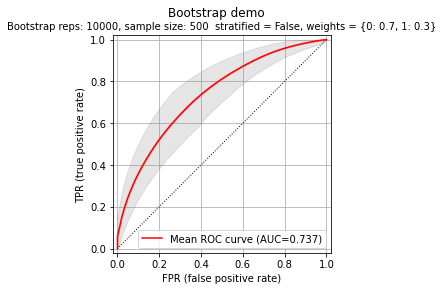

mean = 0.73748990506824
std = 0.039222725555681834
var = 0.0015384222000163368
CI = [[0.73672102 0.73825879]]
TI = [[0.66060162 0.81437819]]


In [91]:
n_bootstrap = 10000
rets = ru.plot_roc_bootstrap(y_score_all, y_true, 
                      n_bootstrap=n_bootstrap,
                      n_samples = 500,
                      stratified = False,
                      weights = {0 : 0.7, 1 : 0.3},
                      title="Bootstrap demo",
                      multi = "Classes",
                      num_classes_or_labels = 2)
plt.show()
print(f"mean = {rets['auc_mean']}")
print(f"std = {rets['auc_std']}")
print(f"var = {rets['auc_std'] ** 2}")
print(f"CI = {rets['auc95_ci']}")
print(f"TI = {rets['auc95_ti']}")